<a href="https://colab.research.google.com/github/tkasod2/TIL/blob/main/zerobase/study/%EC%8B%A4%EC%A0%84_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_4_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%A7%88%EC%BC%80%ED%8C%85_%EC%98%88%EC%82%B0_%EB%B6%84%EB%B0%B0_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 불러오기

In [1]:
# library 불러오기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 데이터 mount 하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import subprocess
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from collections import defaultdict

## 데이터 살펴보기

마케팅 캠페인이 많다면 어떻게 최적화할 수 있을까?

* 데이터셋 출처: https://ailab.criteo.com/ressources/ (광고 리타겟팅 회사 Criteo)

- **Timestamp**: timestamp of the impression
- **UID**: unique user identifier
- **Campaign**: unique campaign identifier
- **Conversion**: 1 if there was a conversion in the 30 days after the impression; 0 otherwise
- **Conversion ID**: a unique identifier for each conversion
- **Click**: 1 if the impression was clicked; 0 otherwise
- **Cost**: the price paid for this ad
- **Cat1-Cat9**: categorical features associated with the ad. These features’ semantic meaning is not disclosed.

In [ ]:
# 참고: jid 는 다음 함수로 구한 값이다. (uid + conversion_id)
# User 가 한번의 전환까지를 각각 하나의 journey라고 보고, jid는 user_id와 conversion_id를 엮은 하나의 구분자


#def add_derived_columns(df):                              
#    df_ext = df.copy()
#    df_ext['jid'] = df_ext['uid'].map(str) + '_' + df_ext['conversion_id'].map(str)

In [4]:
# Load in our data
# 경로 설정
# DRIVE_PATH = "/content/drive/MyDrive/" # 내 드라이브의 경로
# FILE_PATH_IN_MY_DRIVE = 'zerobase/part2_channel_attribution/project_4_ml_and_dl/data/criteo_attribution_dataset_sampled_campaign_300_journey_over_2_points_balanced.csv' # 내 드라이브 내 파일이 있는 경로
# PATH = DRIVE_PATH +  FILE_PATH_IN_MY_DRIVE
PATH = '/content/drive/MyDrive/[바로-써먹는-데이터-분석]-강의자료-new4/2부/Part 2. 효율좋은 마케팅 채널 좀 알려주세요! - 고객 유입 분석/project_4_머신러닝을 활용한 마케팅 예산 분배 최적화/data/criteo_attribution_dataset_sampled_campaign_300_journey_over_2_points_balanced.csv'

df = pd.read_csv(PATH) # csv 파일 읽어오기
df.head(10) # 데이터 상위 5개 불러오기


,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,4,8,0.000172,0.039428,125915,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949
1,1,1398349,225512,32320979,28874676,0,-1,-1,0,1,-1,-1,0.000297,0.353788,17843,30763035,9312274,1461750,29196072,26611394,1973606,30600973,9068204,15351053,32320979_-1
2,2,6206408,991626,29070160,27118781,1,1189040,23460283,1,1,2,6,0.000185,0.098399,412045,30763035,9312274,23032073,29196072,11409686,1973606,9312274,14911188,21091111,29070160_23460283
3,3,12718518,2034017,2567135,10341182,1,2448781,2329559,0,1,2,15,0.000437,0.040025,1280,25259032,7477605,28051086,23549932,32440044,28928366,11989417,29196072,32145478,2567135_2329559
4,4,4850218,748516,12566673,28137208,0,-1,-1,0,0,-1,-1,0.000148,0.180721,1323999,28928366,26597095,29562678,29196072,32440047,1973606,27807725,14911188,18291877,12566673_-1
5,5,13108824,2109500,424335,30801593,0,-1,-1,0,0,-1,-1,0.000010,0.050877,1487397,27093701,26597095,1423188,29196072,5824237,1973606,30434641,14911188,18291877,424335_-1
6,6,13210070,2126292,14645400,28351001,1,2562388,4899465,1,1,24,26,0.001083,0.051058,15975,27093701,9312274,23322867,29196072,5824236,28928366,16628728,29196072,15351053,14645400_4899465
7,7,7791529,1225322,22747856,28739284,0,-1,-1,0,0,-1,-1,0.000153,0.210804,1250034,30763035,9312274,31310250,29196072,32440044,29196072,24078516,29196072,18291877,22747856_-1
8,8,43274,23674,7269593,30801593,0,-1,-1,0,0,-1,-1,0.000022,0.068801,-1,27093701,9312274,1423188,29196072,5824237,29196072,25503734,29196072,29196072,7269593_-1
9,9,15261936,2464666,10337898,29427842,1,2574905,28367511,1,1,7,13,0.006504,0.191145,1510,28928366,28928366,12435261,29196072,5824237,1973606,9180723,9068204,32145478,10337898_28367511


In [5]:
len(df)

602160

In [6]:
df.groupby('campaign')['uid'].count().reset_index().rename(columns = {'uid': 'uid_cnt'})

,campaign,uid_cnt
0,73327,414
1,289466,166
2,336258,65
3,408759,2857
4,497593,8113
...,...,...
295,32137193,139
296,32368241,1226
297,32398755,2463
298,32405311,160


In [7]:
# 현재 Colaboratory RAM 사이즈에 맞춰서 데이터의 양을 더 줄이겠습니다.
# 자주 등장하는 캠페인 상위 50개 추출
campaign_cnt = (
              df.groupby('campaign')['timestamp']
                .count()
                .sort_values(ascending=False)
                .reset_index()
                .rename(columns={'timestamp': 'camp_cnt'})
                .head(50)
              )

In [8]:
campaign_cnt

,campaign,camp_cnt
0,10341182,56151
1,30801593,39373
2,15398570,32891
3,15184511,31525
4,28351001,29132
5,29427842,15714
6,5061834,12954
7,18975823,12164
8,30491418,12142
9,6686701,9742


In [9]:
# 캠페인 상위 50개에 해당하는 이벤트만 가져온다.
df_part = df.merge(campaign_cnt, on = 'campaign')
print(df_part.campaign.nunique())
df = df_part

50


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451364 entries, 0 to 451363
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             451364 non-null  int64  
 1   Unnamed: 0.1           451364 non-null  int64  
 2   timestamp              451364 non-null  int64  
 3   uid                    451364 non-null  int64  
 4   campaign               451364 non-null  int64  
 5   conversion             451364 non-null  int64  
 6   conversion_timestamp   451364 non-null  int64  
 7   conversion_id          451364 non-null  int64  
 8   attribution            451364 non-null  int64  
 9   click                  451364 non-null  int64  
 10  click_pos              451364 non-null  int64  
 11  click_nb               451364 non-null  int64  
 12  cost                   451364 non-null  float64
 13  cpo                    451364 non-null  float64
 14  time_since_last_click  451364 non-nu

유저는 전환하기까지 얼마나 많은 캠페인에 노출될까? 
- jid 별 이벤트 수 파악하기

In [11]:
event_count_per_jid = df.groupby('jid')['timestamp'].count().reset_index()
event_count_per_jid.head()

,jid,timestamp
0,10000148_-1,9
1,1000023_5282678,2
2,10000403_29178244,2
3,1000095_27795443,2
4,10001378_24057324,11


In [12]:
jid_count_per_event_count = event_count_per_jid.groupby('timestamp')['jid'].count()
jid_count_per_event_count

timestamp
1       2653
2      36617
3      17702
4      10119
5       6548
       ...  
212        1
227        1
231        1
240        1
433        1
Name: jid, Length: 104, dtype: int64

In [13]:
event_journey = pd.DataFrame({"event_count": jid_count_per_event_count.index, "journey_count":  jid_count_per_event_count.values})
event_journey.head(10)


,event_count,journey_count
0,1,2653
1,2,36617
2,3,17702
3,4,10119
4,5,6548
5,6,4597
6,7,3207
7,8,2489
8,9,1956
9,10,1516


In [14]:
# jid 한 번당 캠페인을 여러번 보기도 한다.
# jid 1번당 5번까지 본다.
campaign_count_per_jid = df_part.groupby('jid')['campaign'].nunique().reset_index()
jid_count_per_event_count = campaign_count_per_jid.groupby('campaign')['jid'].count()
event_journey = pd.DataFrame({"campaign_count": jid_count_per_event_count.index, "journey_count":  jid_count_per_event_count.values})
event_journey.head(10)

,campaign_count,journey_count
0,1,89749
1,2,5120
2,3,472
3,4,44
4,5,3


## Logistic Regression 을 활용한 마케팅 예산 분배 최적화
* conversion 을 예측하는 모델을 만들고, 전환을 예측했을 때의 logistic regression 의 각 캠페인에 대한 학습된 가중치 (딥러닝에서는 weight, 회귀분석에서는 coefficient 라고 한다) 를 가져온다
* Logistic Regression 의 Weight  =>  attribution weights

### 데이터 전처리하기

In [15]:
df_part.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,4,8,0.000172,0.039428,125915,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,3,5,0.000410,0.035544,87484,30763035,9312274,30867372,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,6,7,0.000884,0.004000,31108,30763035,9312274,7726221,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,36,40,0.001901,0.038073,36920,28928366,9312274,30867372,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,3,6,0.000134,0.036769,452516,30763035,9312274,30867372,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890


컬럼 전처리를 진행한다. 
- 어떻게 데이터를 바꿀까?
- 무엇을 할까?

먼저 timestamp 정보를 scaling 해준다
- minmaxscaler 를 통해 0 - 1 사이의 값으로 바꿔준다

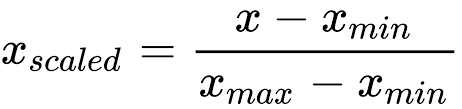

In [ ]:
# 예를 들어 최대 최소가 각각 100, 0
# x = 50 이면 (50 - 0) / (100 - 0) = 0.5

In [16]:
min_max_scaler = MinMaxScaler()
df['timestamp_norm'] =  min_max_scaler.fit_transform(df[['timestamp']])

df.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,timestamp_norm
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,4,8,0.000172,0.039428,125915,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890,0.078397
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,3,5,0.000410,0.035544,87484,30763035,9312274,30867372,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890,0.463510
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,6,7,0.000884,0.004000,31108,30763035,9312274,7726221,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,0.573463
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,36,40,0.001901,0.038073,36920,28928366,9312274,30867372,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890,0.155731
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,3,6,0.000134,0.036769,452516,30763035,9312274,30867372,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890,0.514153


카테고리 데이터를 모델이 이해할 수 있는 숫자형으로 바꾼다.
- 위의 데이터에서 카테고리형 데이터는 캠페인, 그리고 카테고리 1~9이다

카테고리 데이터를 one-hot vector 로 바꾼다

* one-hot encoding 이란?
  * ["Apple", "Banana", "Abocado"]
  * [[1,0,0], [0,1,0], [0,0,1]]

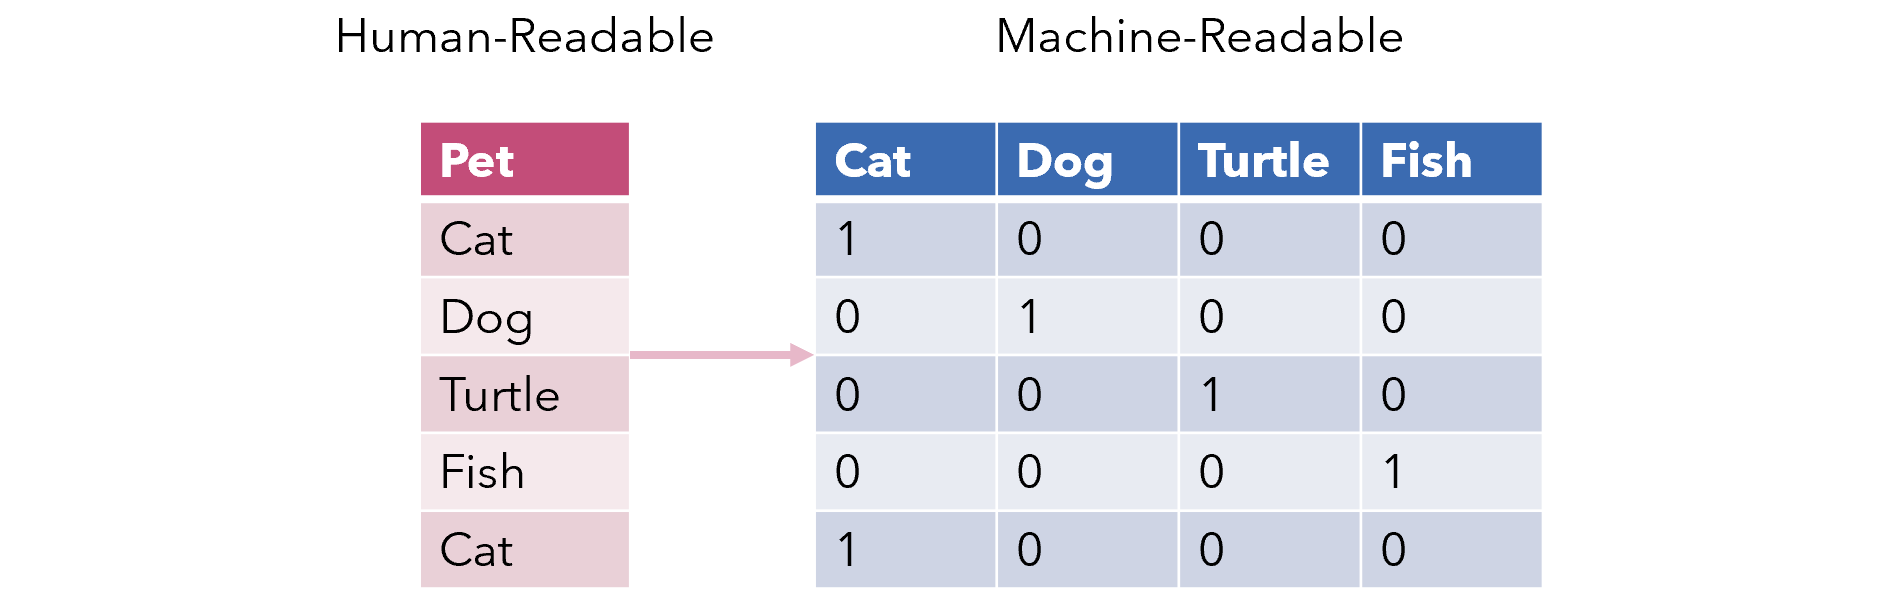

In [17]:
df.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,timestamp_norm
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,4,8,0.000172,0.039428,125915,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890,0.078397
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,3,5,0.000410,0.035544,87484,30763035,9312274,30867372,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890,0.463510
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,6,7,0.000884,0.004000,31108,30763035,9312274,7726221,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,0.573463
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,36,40,0.001901,0.038073,36920,28928366,9312274,30867372,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890,0.155731
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,3,6,0.000134,0.036769,452516,30763035,9312274,30867372,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890,0.514153


In [24]:
print(df['cat1'].nunique())
print()
print(df['cat1'].drop_duplicates())
print()
df['cat1'].unique()

9

0      30763035
3      28928366
6      27093701
8      25259032
17      9312274
54      5824233
57      5642940
58       138937
196     1973606
Name: cat1, dtype: int64



array([30763035, 28928366, 27093701, 25259032,  9312274,  5824233,
        5642940,   138937,  1973606])

In [26]:
# 2개의 카테고리 컬럼을 하나의 one_hot vector 컬럼으로 만든다.

# Step 1) 각 카테고리에 List 의 Index 를 하나씩 할당한다.
# Cat -> 1, Rabbit -> 2 ...
# 여기서는 카테고리 여러개를 합쳐서 한개의 카테고리 one-hot vector 를 만들려고 한다.
column_names = ['cat1', 'cat2']
mapper = {}  # List 의 인덱스를 저장할 mapper                                        
for column_idx, col_name in enumerate(column_names):  # 각 컬럼 별로 돌면서
    print(column_idx, col_name)   
    unique_values_per_column = df[col_name].unique() # Cat1 의 Unique 한 카테고리 종류를 먼저 가져온다.
    print(unique_values_per_column, len(unique_values_per_column))
    for val in unique_values_per_column: # cat1의 카테고리 아이디를 다 돌면서

        # val = 30763035 -> val * 10 = 307630350
        unique_category_id = val*10 + column_idx # 모든 카테고리에 중복되는 값이 없도록 아이디 * 10 + 1 을 한다.
        mapper[unique_category_id] = len(mapper)
    print("="*10+"iteration "+"="*10)

0 cat1
[30763035 28928366 27093701 25259032  9312274  5824233  5642940   138937
  1973606] 9
==========iteration ==========
1 cat2
[ 9312274 29196072  7477605 26597095  5642940 28928366  5824235 27093701
   138937  5824232 25259032  5824233  5824237 30763035 32440047  5824234
 26597096  5824236  1973606  3808271  5824239 32440053 32440040 32440041
 21611414  9068208 23998117] 27
==========iteration ==========


In [ ]:
# unique_category_id = val*10 + column_idx 이 코드를 더 설명해보면.
# 앞에서 cat1 의 column_idx는 0
# 맨끝자리는 카테고리 1을 의미하게 된다!
# 30763035 -> 307630350 -> 307630350 + 0

In [27]:
len(mapper)

36

In [28]:
# column index (category index) = 0, category id = 30763035
mapper[30763035*10 + 0]

0

In [29]:
# One hot vector 만들기 
# Step 2) mapper 의 길이에 해당하는 빈 배열을 가져와서, 각 row에 해당하는 카테고리 값만 1로 채운다
def one_hot(values):
    v = np.zeros( len(mapper) ) # mapper 의 길이만큼 0으로 채운 배열을 준비한다
    for i, val in enumerate(values): # 각각의 값을 돌면서
        mapped_val_id = mapper[val*10 + i] # mapper 에서 우리가 저장한 index (id)를 가져온다
        v[mapped_val_id] = 1 # 그 index 만 1로 채운다
    return v 

In [30]:
# 각 row 마다 one hot vector 로 만들려고 하는 컬럼들의 list 를 불러온다
df_ext = df.copy()
df_ext['test_col'] = df_ext[column_names].values.tolist()
df_ext['test_col'].head()

# [30763035, 9312274]

0    [30763035, 9312274]
1    [30763035, 9312274]
2    [30763035, 9312274]
3    [28928366, 9312274]
4    [30763035, 9312274]
Name: test_col, dtype: object

In [31]:
df_ext['test_col'] = df_ext['test_col'].map(one_hot)

In [35]:
# [30763035, 9312274] 
list(df_ext['test_col'].head(1).values)

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])]

In [36]:
def map_one_hot(df, column_names, result_column_name):      
    mapper = {}                                             
    for i, col_name in enumerate(column_names):             
        for val in df[col_name].unique():                   
            mapper[val*10 + i] = len(mapper)
    
    def one_hot(values):
        v = np.zeros( len(mapper) )
        for i, val in enumerate(values): 
            mapped_val_id = mapper[val*10 + i]
            v[mapped_val_id] = 1
        return v    
    
    df_ext = df.copy()
    df_ext[result_column_name] = df_ext[column_names].values.tolist()
    df_ext[result_column_name] = df_ext[result_column_name].map(one_hot)
    
    return df_ext, mapper

In [34]:
# all categories are mapped to one vector  
df2, mapper_cate = map_one_hot(df, ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat8'], 'cats')
# the final dataframe used for modeling
df3, mapper_campaigns = map_one_hot(df2, ['campaign'], 'campaigns')

In [39]:
print(list(mapper_cate)[:10])
print()
print(list(mapper_campaigns)[:10])

[307630350, 289283660, 270937010, 252590320, 93122740, 58242330, 56429400, 1389370, 19736060, 93122741]

[104741060, 288746760, 271187810, 103411820, 281372080, 308015930, 283510010, 287392840, 294278420, 157464190]


In [40]:
df3.head()

,Unnamed: 0,Unnamed: 0.1,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,jid,camp_cnt,timestamp_norm,cats,campaigns
0,0,1265256,209415,21670661,10474106,1,1420115,17559949,0,1,4,8,0.000172,0.039428,125915,30763035,9312274,30867372,29196072,11409684,30763035,8549927,29196072,29520626,21670661_17559949,7890,0.078397,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,55,7851159,1238119,3661462,10474106,1,1672978,24286866,0,1,3,5,0.000410,0.035544,87484,30763035,9312274,30867372,29196072,11409684,28928366,8549927,29196072,29520629,3661462_24286866,7890,0.463510,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,76,9578475,1531823,8030609,10474106,1,1531964,16414421,0,1,6,7,0.000884,0.004000,31108,30763035,9312274,7726221,29196072,11409684,32440041,8549927,29196072,9491351,8030609_16414421,7890,0.573463,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,89,2626351,415988,25962703,10474106,1,1389157,8416473,0,1,36,40,0.001901,0.038073,36920,28928366,9312274,30867372,29196072,11409684,1973606,8549927,14911188,9491354,25962703_8416473,7890,0.155731,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,137,8769546,1373396,4813350,10474106,1,1710543,17834428,1,1,3,6,0.000134,0.036769,452516,30763035,9312274,30867372,29196072,11409684,27093701,8549927,29196072,8661623,4813350_17834428,7890,0.514153,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### Logistic을 위해 추가 데이터 전처리

In [41]:
import numpy as np

In [42]:
# jid 1 camp [0, 1, 0], cats [1, 0, 0], timestamp 1
# jid 1 camp [0, 0, 1], cats [0, 1, 0], timestamp 2

# =>
# jid 1개 당 feature vector 1개로 바꾸자

# jid 1 camp [0, 1, 1], cats [1, 1, 0] 


In [43]:
def pairwise_max(series):
    return np.max(series.tolist(), axis = 0).tolist()

In [46]:
# [1, 0, 0]
# [0, 1, 0]
# => [1, 1, 0]
series = pd.Series([[1, 0, 0],[0, 1, 0]])
np.max(series.tolist(), axis = 0)

array([1, 1, 0])

In [47]:
# pairwise max 함수 뜯어보기
# 캠페인 여러개일 때 하나의 many-hot vector (여러개의 1이 있는 형태)로 변경해준다.
series = pd.Series([[0, 0, 0],[0, 1, 0]])
np.max(series.tolist(), axis = 0).tolist()

[0, 1, 0]

In [48]:
aggregation = {                      # aggregation specification for each feature
    'campaigns': pairwise_max, # one-hot
    'cats': pairwise_max, # # one-hot
    'click': 'sum', # click 의 sum
    'cost': 'sum', # 비용 sum
    'conversion': 'max' # jid 별로 전환했는지 안했는지 여부
}

In [49]:
# 우리가 원하는 feature 를 만들기 위해 각각의 column에 aggregation 을 수행한다
df_agg = df3.groupby(['jid']).agg(aggregation)

In [50]:
# features 컬럼에 전체 feature 를 묶어서 list 로 넣는다
df_agg['features'] = df_agg[['campaigns', 'cats', 'click', 'cost']].values.tolist()
df_agg['features'].head()

jid
10000148_-1          [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1000023_5282678      [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
10000403_29178244    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1000095_27795443     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
10001378_24057324    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: features, dtype: object

In [51]:
df_agg.head()

,campaigns,cats,click,cost,conversion,features
jid,,,,,,
10000148_-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0.001278,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1000023_5282678,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.002972,1,"[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10000403_29178244,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.000671,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1000095_27795443,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,0.001216,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
10001378_24057324,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",11,0.057412,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [52]:
x = np.stack(df_agg['features'].map(lambda x: np.hstack(x)).values)
y = df_agg['conversion'].values

In [53]:
x.shape
# jid 95388
# feature 의 길이 376

(95388, 376)

In [54]:
y.shape

# 각각의 95388개의 jid 별로 전환되었는지, 1 or 0 

(95388,)

In [55]:
df_agg['features'].head(1).values[0]

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

* 참고: numpy stack and hstack

In [59]:
# numpy hstack
# array를 가로로 이어준다
# np.hstack([campaigns,cats, click, cost ..])
test = [[0,1,0],[1,1,0],0, 0.123]
np.hstack(test)

array([0.   , 1.   , 0.   , 1.   , 1.   , 0.   , 0.   , 0.123])

In [60]:
# numpy stack
a = np.array([1, 2]) # a.shape=(2, )
print(a.shape)
b = np.array([1, 2]) # b.shape=(2, )
print(b.shape)

c = np.stack((a, b))

print(c.shape)
print(c)
# [[1 2]
# [1 2]]

#jid 1 [1,1, 0, 0, 0]
#jid 2 [1,1, 0, 0, 0]
# [[1,1, 0, 0, 0], [1,1, 0, 0, 0]]

(2,)
(2,)
(2, 2)
[[1 2]
 [1 2]]


### Dataset Splitting

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)            # train-test split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20)  # train-validation split

### Logistic Regression 학습

In [63]:
# keras, tensorflow 를 사용한다
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [64]:
np.shape(x)[1]

376

In [65]:
# 376 개의 feature 를 input 으로 받아 단 1개의 output 을 내보내는 layer 하나를 만든다!

# Step 1: 로지스틱 리그레션 모델 구조를 만든다
m = np.shape(x)[1] 
model = keras.Sequential()  
model.add(layers.Dense(1, input_dim = m, activation = 'sigmoid', name = 'contributions')) 

# Step 2: 손실함수와 optimizer 를 선택해주면 됩니다
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 


model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val)) 
score = model.evaluate(x_test, y_test) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Epoch 1/10
477/477 [==============================] - 3s 3ms/step - loss: 0.5667 - accuracy: 0.7345 - val_loss: 0.5048 - val_accuracy: 0.7840
Epoch 2/10
477/477 [==============================] - 1s 3ms/step - loss: 0.4924 - accuracy: 0.7894 - val_loss: 0.4752 - val_accuracy: 0.7915
Epoch 3/10
477/477 [==============================] - 1s 3ms/step - loss: 0.4726 - accuracy: 0.7955 - val_loss: 0.4612 - val_accuracy: 0.7981
Epoch 4/10
477/477 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.8015 - val_loss: 0.4528 - val_accuracy: 0.8010
Epoch 5/10
477/477 [==============================] - 1s 2ms/step - loss: 0.4542 - accuracy: 0.8041 - val_loss: 0.4471 - val_accuracy: 0.8038
Epoch 6/10
477/477 [==============================] - 1s 2ms/step - loss: 0.4489 - accuracy: 0.8068 - val_loss: 0.4428 - val_accuracy: 0.8053
Epoch 7/10
477/477 [==============================] - 1s 2ms/step - loss: 0.4449 - accuracy: 0.8091 - val_loss: 0.4398 - val_accuracy: 0.8057
Epoch 

### 각 캠페인의 기여도 계산 및 비교

In [66]:
n_campaigns = 50 # 50개
keras_logreg = model.get_layer('contributions').get_weights()[0].flatten()[0:n_campaigns]

# 376 -> 50
len(keras_logreg)

50

In [67]:
from sklearn.utils.extmath import softmax

# softmax 함수를 사용해 합을 1.0 이 나오도록 함
keras_logreg = softmax([keras_logreg]).flatten()

In [68]:
keras_logreg

array([0.03709265, 0.00745109, 0.0248502 , 0.01620073, 0.01388185,
       0.01545555, 0.02581435, 0.01896803, 0.01933668, 0.01362273,
       0.01844866, 0.02827032, 0.02725743, 0.0176743 , 0.0132831 ,
       0.01824875, 0.01806168, 0.0225681 , 0.02070199, 0.01545584,
       0.01480323, 0.01578429, 0.02238627, 0.02496168, 0.02048142,
       0.0176886 , 0.01607709, 0.01752613, 0.01225098, 0.01674167,
       0.0144031 , 0.02005905, 0.01827475, 0.02620243, 0.01563833,
       0.02645287, 0.02965125, 0.03531687, 0.01886539, 0.03249196,
       0.02320641, 0.0131233 , 0.02565418, 0.00933503, 0.02094846,
       0.01201242, 0.01911787, 0.02723656, 0.01734657, 0.02331776],
      dtype=float32)

In [69]:
np.sum(keras_logreg)

0.9999999

### Baseline: Last Click Attribution Model

In [70]:
df3['campaigns'].head()

0    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: campaigns, dtype: object

In [71]:
np.argmax([3,1000, 1, 2, 100])
# Max값의 Index

1

In [72]:
# 1) 각 캠페인마다 노출수를 세는 함수
def count_by_campaign(df):                         
    counters = np.zeros(n_campaigns) # 50 size 의 zero vector (array)
    for campaign_one_hot in df['campaigns'].values:
        campaign_id = np.argmax(campaign_one_hot)
        counters[campaign_id] = counters[campaign_id] + 1
    return counters

campaign_impressions = count_by_campaign(df3) 

In [73]:
campaign_impressions

array([ 7890.,  3917.,  9387., 56151.,  2860., 39373., 29132.,  4190.,
       15714.,  5337., 31525.,  8317.,  5440.,  5931.,  6434.,  3482.,
        8113.,  5199.,  3124., 32891.,  3604.,  9364.,  3301.,  7504.,
        9742., 12954.,  4396.,  2897.,  2760.,  4397.,  8565.,  5682.,
        4946., 12164.,  3645.,  6717., 12142.,  7752.,  3014.,  2647.,
        4329.,  3108.,  2857.,  2572.,  7374.,  3427.,  2705.,  3332.,
        6211.,  2849.])

In [74]:
# 2) Conversion 전에 마지막으로 본 캠페인의 수를 센다.

# 전환된 데이터셋
dfc = df3[df3['conversion'] == 1]

# 전환된 데이터셋 dfc 에서
# timestamp 가 max 인 데이터만 필터링 걸겠다
idx = dfc.groupby(['jid'])['timestamp_norm'].transform(max) == dfc['timestamp_norm']

In [75]:
# 마지막 전환에 얼마나 영향을 미쳤는지
# 마지막 전환일 때 각 캠페인 별로 몇번 노출되었는가?
campaign_conversions = count_by_campaign(dfc[idx])

In [76]:
# 캠페인 별 전환수를 캠페인 별 노출수로 나눠준다.
lta = campaign_conversions / campaign_impressions

In [77]:
# Logistic Regression 과 마찬가지로 기여도 Weight 의 합이 1이 되도록 조정한다.
lta_sum = lta.sum()
lta_normalize  = lta / lta_sum
print(sum(lta_normalize))

1.0000000000000002


In [78]:
import seaborn as sns

data1 = pd.DataFrame({"attribution":keras_logreg, "method": "logistic", "campaign": range(0, 50)})
data2 = pd.DataFrame({"attribution":lta_normalize, "method": "last", "campaign": range(0, 50)})
total = pd.concat([data1, data2]).reset_index()
total.head()

,index,attribution,method,campaign
0,0,0.037093,logistic,0
1,1,0.007451,logistic,1
2,2,0.024850,logistic,2
3,3,0.016201,logistic,3
4,4,0.013882,logistic,4


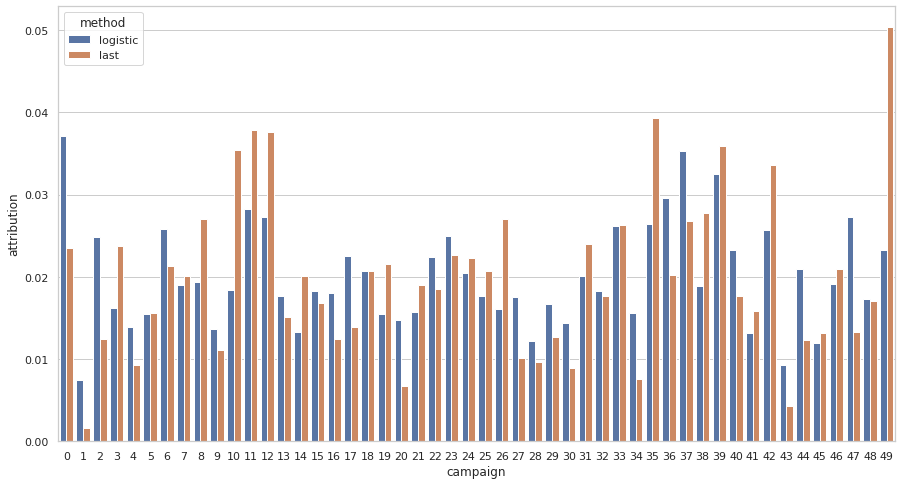

In [79]:
sns.set_theme(style="whitegrid")
g = sns.barplot(x= total.campaign,y = total.attribution, hue = total.method)
g.figure.set_size_inches(15, 8)

## 마케팅 예산 분배 시뮬레이션

* 예산을 지정한다.
* 예산을 캠페인의 기여도에 맞게 분배한다.
* 과거 유저의 전환 내역을 Replay 한다.
    * 캠페인이 노출되었다면 각 캠페인의 예산을 차감하고
    * 전환이 실제 되었다면 전환에 + 1을 해준다
    * 캠페인이 과거에 노출되었는데, 해당 캠페인에 대한 예산은 다 쓴 상태라면 blacklist 에 넣어준다.
* 계산은 conversion - blacklist 로 한다.

In [80]:
def get_campaign_id(x_journey_step):
    return np.argmax(x_journey_step[0:n_campaigns])

def simulate_budget_roi(df, budget_total, attribution):
    # Weight 만큼 예산을 각 캠페인에 나눈다.
    budgets = np.ceil(attribution * (budget_total / np.sum(attribution)))
    
    # 예산을 다 써서 시뮬레이션을 더 이상 진행할 수 없는 Journey  
    blacklist = set()

    # Conversion 이 일어난 Journey  
    conversions = set()

    # 데이터셋을 돌면서 시뮬레이션 시작
    for i in range(df.shape[0]):   
        # 해당 이벤트에서 노출된 캠페인 ID 를 가져오고                               
        campaign_id = get_campaign_id(df.loc[i]['campaigns']) 
        # 해당 jid를 가져온다.
        jid = df.loc[i]['jid']


        if jid not in blacklist:

            # 캠페인에 대한 예산이 있다면
            if budgets[campaign_id] >= 1:

                # 예산에서 1원를 사용하고
                budgets[campaign_id] = budgets[campaign_id] - 1

                # 전환했다면
                if(df.loc[i]['conversion'] == 1):
                    # 전환한 jid 로 추가한다.
                    conversions.add(jid)
            else:
                # 해당 캠페인에 대한 예산이 없다면, 
                # 과거에 해당 jid 에 대한 시뮬레이션은 멈춘다. 
                blacklist.add(jid)
            
    return len(conversions.difference(blacklist))

In [81]:
# 데이터가 너무 크면 시뮬레이션이 오래걸리니 강의에서는 1만개로 제약을 둔다.
# 재현을 위한 seed 고정
sample_data = df3.sample(n = 10000, random_state=6666)
sample_data = sample_data.sort_values('timestamp_norm')


* pitch (attributions ** pitch) : 각 캠페인 별 기여도의 격차를 크게 벌릴지 작게 벌릴지! 기여도를 제곱한다.

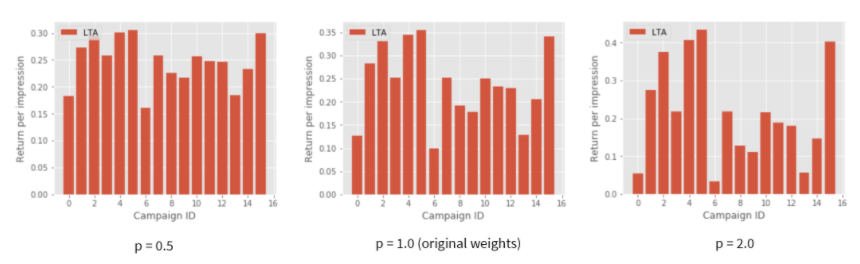

In [82]:
pitches = np.arange(0.0, 3.0, 0.5)
pitches
# 0, 0.5, 1, 1.5 ...

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [83]:
# lta
budget_total = 5000
attribution = lta

budget_lta = []
for pitch in pitches:
  conversion = simulate_budget_roi(sample_data.reset_index(), budget_total, attribution**pitch)
  print(pitch, conversion)
  budget_lta.append(conversion)

0.0 1763
0.5 1904
1.0 1906
1.5 1818
2.0 1711
2.5 1581


In [84]:
budget_total = 5000
attribution = keras_logreg

budget_logreg = []
for pitch in pitches:
  conversion = simulate_budget_roi(sample_data.reset_index(), budget_total, attribution**pitch)
  print(pitch, conversion)
  budget_logreg.append(conversion)

0.0 1763
0.5 1878
1.0 1958
1.5 1947
2.0 1912
2.5 1846


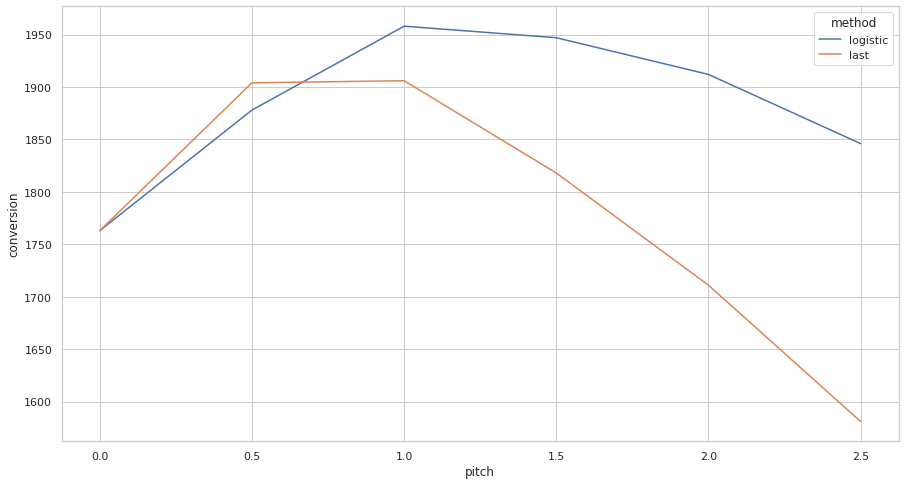

In [85]:
import seaborn as sns

data1 = pd.DataFrame({"conversion":budget_logreg, "method": "logistic", "pitch": pitches})
data2 = pd.DataFrame({"conversion":budget_lta, "method": "last", "pitch": pitches})
total = pd.concat([data1, data2]).reset_index()

sns.set_theme(style="whitegrid")
g = sns.lineplot(x= total.pitch ,y = total.conversion, hue = total.method)
g.figure.set_size_inches(15, 8)